In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('src/datasets/clean.csv', parse_dates=['Date'])

In [10]:
df.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Fatalities,Fatalities Crew,Summary,Climatic,Criminal_Activities,Country,Military_Operation,Survivors,Weekday,Year,Month
0,1908-09-17,17.0,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",False,False,United States,True,1.0,Thursday,1908,9
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...,False,False,France,False,0.0,Tuesday,1909,9
2,1912-07-12,6.0,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,False,False,United States,True,0.0,Friday,1912,7
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,1.0,1.0,The first fatal airplane accident in Canada oc...,True,False,Canada,False,0.0,Wednesday,1913,8
4,1913-09-09,18.0,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,NaN,The airship flew into a thunderstorm and encou...,True,False,Ocean,True,6.0,Tuesday,1913,9


Create a new column to categorise the data by decade.

In [35]:
bins = list(range(1908, 2029, 10))
labels = [f'{decade}-{decade+9}' for decade in range(1908, 2028 , 10)]
df['Decade'] = pd.cut(df['Year'], bins=bins, labels=labels)

Objective: Evaluate the 10% reduction in the crew fatality rate over the last ten years, compared to the previous decade.

The crew fatality rate is defined as the total number of decreased crew members in the decade, divided by the total number of accidents occurred in the same perior of time.

Steps:
- Creat a new dataset named kpi_1 with the columns 'Fatalities Crew' and 'Total Accidents' grouped by decade and perform the necessary aggregation function.
- Create the 'Mortality Rate' metric to evaluate our KPI.
- Evauate the KPI.

In [317]:
kpi_1 = df.groupby(['Decade'], observed=True).agg({'Fatalities Crew':'sum', 'Date':'count'})

kpi_1.rename({'Date': 'Total Crashes'}, axis=1, inplace=True)

kpi_1['Mortality Rate'] = round((kpi_1['Fatalities Crew'] / kpi_1['Total Crashes']), 2)

kpi_1['kpi_1'] = round((1 - kpi_1['Mortality Rate'].div(kpi_1['Mortality Rate'].shift())) * -1, 2).fillna(0)

In [318]:
kpi_1

,Fatalities Crew,Total Crashes,Mortality Rate,kpi_1
Decade,,,,
1908-1917,43.0,23,1.87,0.00
1918-1927,248.0,152,1.63,-0.13
1928-1937,754.0,369,2.04,0.25
1938-1947,1753.0,543,3.23,0.58
1948-1957,2467.0,653,3.78,0.17
1958-1967,2597.0,642,4.05,0.07
1968-1977,2453.0,621,3.95,-0.02
1978-1987,1913.0,530,3.61,-0.09
1988-1997,2156.0,652,3.31,-0.08


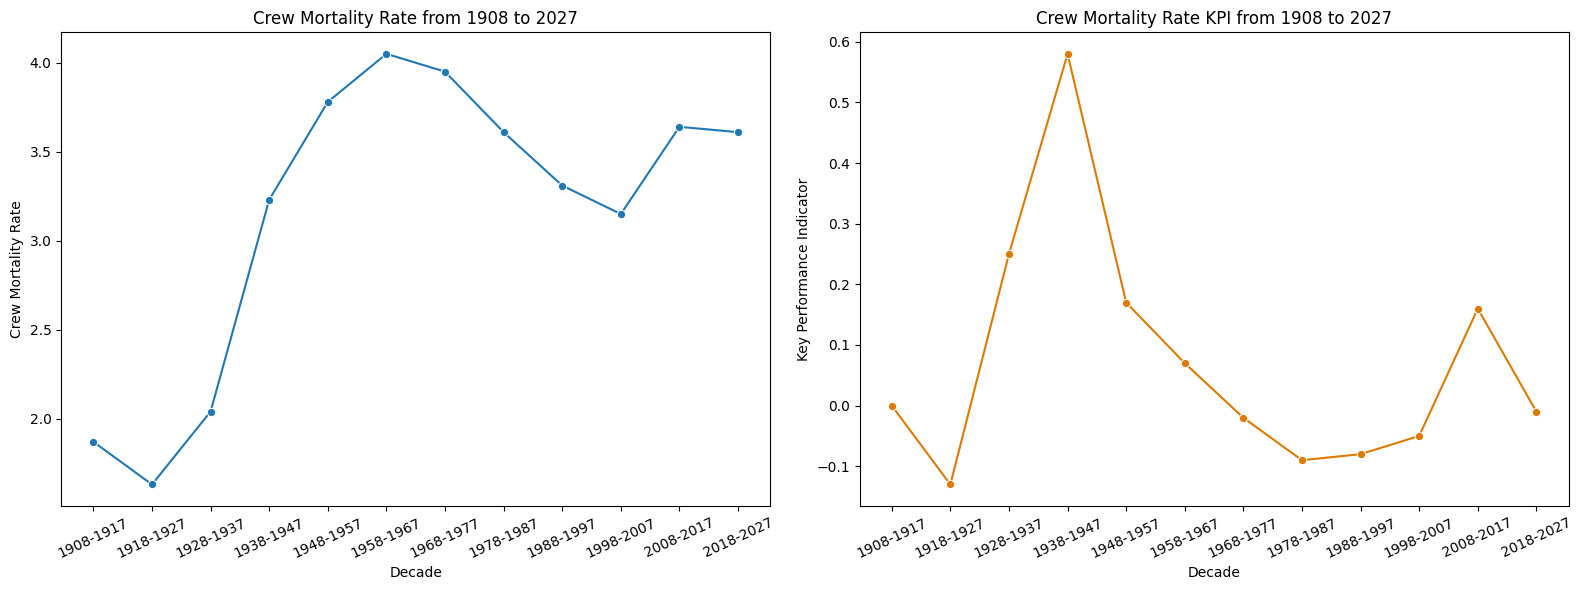

In [314]:
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

sns.lineplot(data=kpi_1, x=kpi_1.index, y='Mortality Rate', linestyle='-', ax=ax1, marker='o', markersize=6)

ax1.set_xlabel('Decade')
ax1.set_ylabel('Crew Mortality Rate')
ax1.set_title('Crew Mortality Rate from 1908 to 2027')
ax1.set_xticks(range(len(kpi_1.index)))
ax1.set_xticklabels(kpi_1.index, rotation=25)

sns.lineplot(data=kpi_1, x=kpi_1.index, y='kpi_1', linestyle='-', ax=ax2, color='#DE7A00', marker='o', markersize=6)

ax2.set_xlabel('Decade')
ax2.set_ylabel('Key Performance Indicator')
ax2.set_title('Crew Mortality Rate KPI from 1908 to 2027')
ax2.set_xticks(range(len(kpi_1.index)))
ax2.set_xticklabels(kpi_1.index, rotation=25)

plt.tight_layout()
plt.show()

Objective: Evaluate the 20% reduction in Aeroflot's accident rate over the past decade compared to ten years ago.

The accident rate is defined as the number of accidents that the airline Aeroflot's suffer in the decade divided by the total amount of crashes that occurred 10 years ago.

Steps:
- Creat a new dataset named kpi_2 with the rows that contains the operator Aeroflot and group the data by decade.
- Create a new column with the total number of crashes for that decade.
- Create the necessary metric to evaluate our KPI.
- Evauate the KPI.

In [309]:
kpi_2 = df[df['Operator'] == 'Aeroflot'].groupby(['Decade'], observed=False).size()

kpi_2 = pd.concat((kpi_2, df.groupby(['Decade'], observed=False).size()),axis=1)

kpi_2.columns = ['Aeroflot Crashes','Total Crashes']

kpi_2 = kpi_2.loc['1928-1937':]

kpi_2['Crash_Rate'] = round((kpi_2['Aeroflot Crashes'] / kpi_2['Total Crashes']), 3)

kpi_2['kpi_2'] = round((1 - kpi_2['Crash_Rate'].div(kpi_2['Crash_Rate'].shift())) * -1, 2).fillna(0)

In [310]:
kpi_2

,Aeroflot Crashes,Total Crashes,Crash_Rate,kpi_2
Decade,,,,
1928-1937,3,369,0.008,0.00
1938-1947,17,543,0.031,2.88
1948-1957,29,653,0.044,0.42
1958-1967,52,642,0.081,0.84
1968-1977,82,621,0.132,0.63
1978-1987,49,530,0.092,-0.30
1988-1997,20,652,0.031,-0.66
1998-2007,1,523,0.002,-0.94
2008-2017,0,271,0.000,-1.00


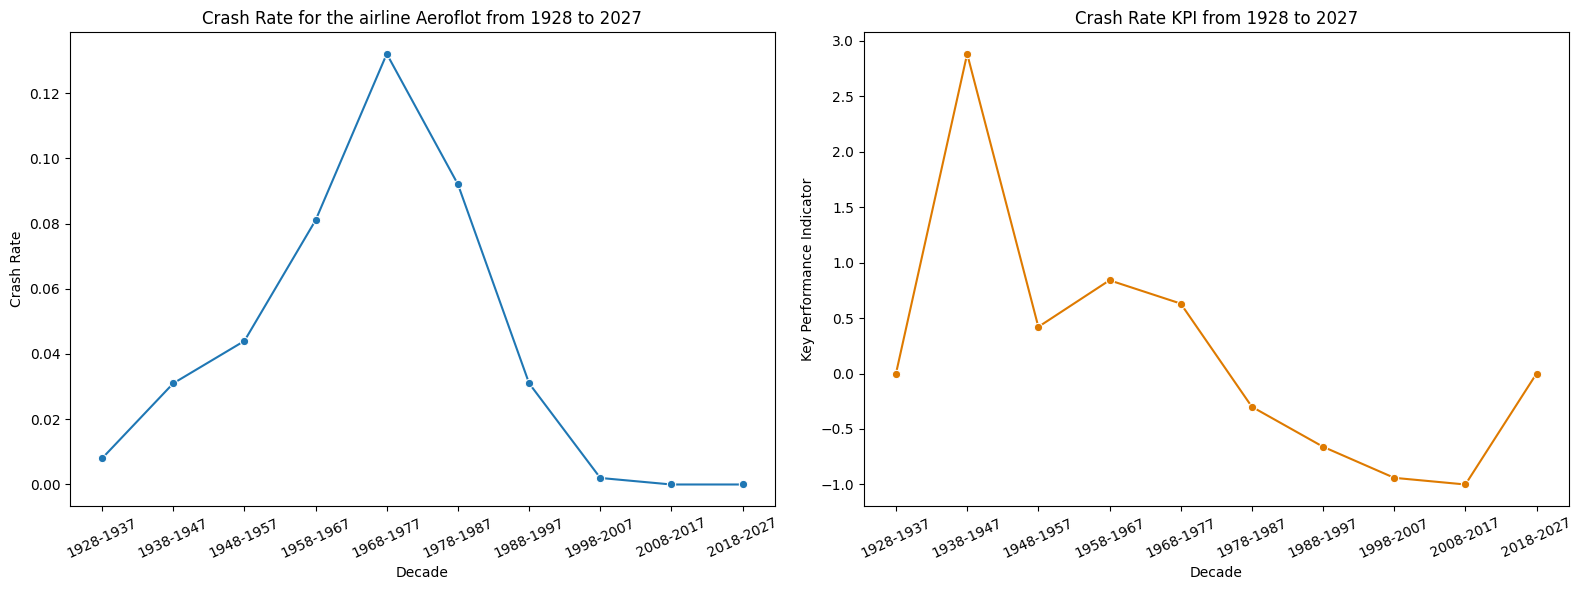

In [311]:
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

sns.lineplot(data=kpi_2, x=kpi_2.index.values.tolist(), y='Crash_Rate', linestyle='-', ax=ax1, marker='o', markersize=6)

ax1.set_xlabel('Decade')
ax1.set_ylabel('Crash Rate')
ax1.set_title('Crash Rate for the airline Aeroflot from 1928 to 2027')
ax1.set_xticks(range(len(kpi_2.index)))
ax1.set_xticklabels(kpi_2.index, rotation=25)

sns.lineplot(data=kpi_2, x=kpi_2.index.values.tolist(), y='kpi_2', linestyle='-', ax=ax2, color='#DE7A00', marker='o', markersize=6)

ax2.set_xlabel('Decade')
ax2.set_ylabel('Key Performance Indicator')
ax2.set_title('Crash Rate KPI from 1928 to 2027')
ax2.set_xticks(range(len(kpi_2.index)))
ax2.set_xticklabels(kpi_2.index, rotation=25)

plt.tight_layout()
plt.show()

Objective: Evaluate the 20% improvement in the survival rate over the past decade compared to ten years ago.

The survival rate is defined as the number of survivors over the past decade divided by the total number of individuals aboard plane crashes during the last ten years.

Steps:
- Creat a new dataset named kpi_3 with the rows that contains the operator Aeroflot and group the data by decade.
- Create a new column with the total number of crashes for that decade.
- Create the necessary metric to evaluate our KPI.
- Evauate the KPI.

In [315]:
kpi_3 = df.groupby(['Decade'], observed=True).agg({'Survivors':'sum', 'Aboard':'sum'})

kpi_3['Survivors Rate'] = round((kpi_3['Survivors'] / kpi_3['Aboard']), 2)

ranges_list = kpi_3.index.tolist()

kpi_3['kpi_3'] = round((1 - kpi_3['Survivors Rate'].div(kpi_3['Survivors Rate'].shift())) * -1, 2).fillna(0)

In [316]:
kpi_3

,Survivors,Aboard,Survivors Rate,kpi_3
Decade,,,,
1908-1917,33.0,429.0,0.08,0.00
1918-1927,133.0,664.0,0.20,1.50
1928-1937,693.0,2704.0,0.26,0.30
1938-1947,1665.0,9565.0,0.17,-0.35
1948-1957,3543.0,15351.0,0.23,0.35
1958-1967,4423.0,20507.0,0.22,-0.04
1968-1977,7288.0,27129.0,0.27,0.23
1978-1987,7770.0,24258.0,0.32,0.19
1988-1997,8311.0,25631.0,0.32,-0.00


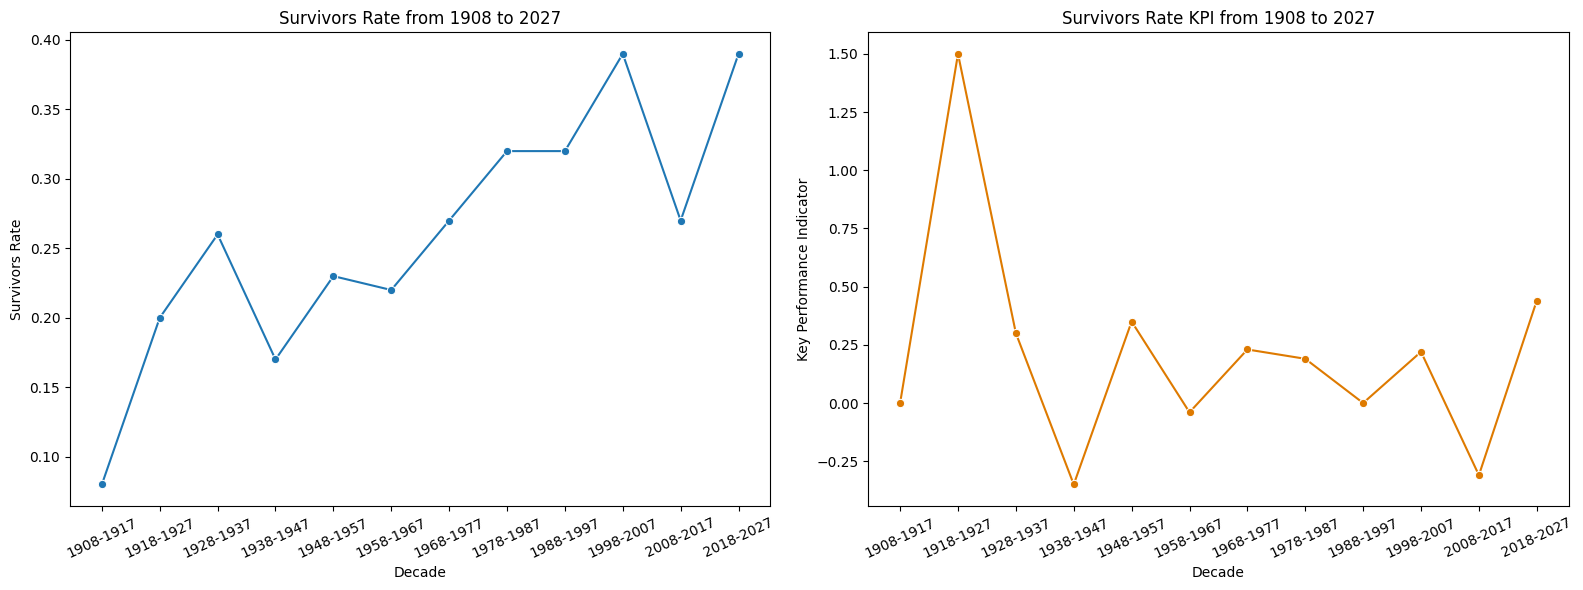

In [321]:
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

sns.lineplot(data=kpi_3, x=kpi_3.index, y='Survivors Rate', linestyle='-', ax=ax1, marker='o', markersize=6)

ax1.set_xlabel('Decade')
ax1.set_ylabel('Survivors Rate')
ax1.set_title('Survivors Rate from 1908 to 2027')
ax1.set_xticks(range(len(kpi_3.index)))
ax1.set_xticklabels(kpi_3.index, rotation=25)

sns.lineplot(data=kpi_3, x=kpi_3.index, y='kpi_3', linestyle='-', ax=ax2, color='#DE7A00', marker='o', markersize=6)

ax2.set_xlabel('Decade')
ax2.set_ylabel('Key Performance Indicator')
ax2.set_title('Survivors Rate KPI from 1908 to 2027')
ax2.set_xticks(range(len(kpi_3.index)))
ax2.set_xticklabels(kpi_3.index, rotation=25)

plt.tight_layout()
plt.show()